# Reading and Saving an Image

In [2]:
import numpy as np
import cv2

# Load an color image in grayscale
img = cv2.imread('leaf.jpg',0)

In [3]:
cv2.imshow('image',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# cv2.imwrite('new.png',img) how to save an image to directory

In [4]:
img = cv2.imread('leaf.jpg',0)
cv2.imshow('image',img)
k = cv2.waitKey(0)
if k == 27:         # wait for ESC key to exit
    cv2.destroyAllWindows()
elif k == ord('s'): # wait for 's' key to save and exit
    cv2.imwrite('new.png',img)
    cv2.destroyAllWindows()

# Using MatPlotLib

In [5]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

def display_both(old, new):
    old = old
    new = new
    
    plt.subplot(),plt.imshow(old, interpolation = 'bicubic')
    plt.title('Old')
    plt.show()
    plt.subplot(),plt.imshow(new, interpolation = 'bicubic')
    plt.title('New'),plt.xticks([]), plt.yticks([])  # to hide tick values on X and Y axis
    plt.show()

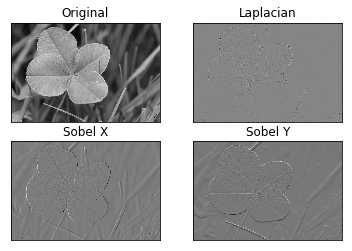

In [6]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('leaf2.jpg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()

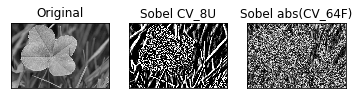

In [7]:
img = cv2.imread('leaf2.jpg',0)

# Output dtype = cv2.CV_8U
sobelx8u = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=5)

# Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
sobelx64f = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
abs_sobel64f = np.absolute(sobelx64f)
sobel_8u = np.uint8(abs_sobel64f)

plt.subplot(1,3,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,2),plt.imshow(sobelx8u,cmap = 'gray')
plt.title('Sobel CV_8U'), plt.xticks([]), plt.yticks([])
plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

plt.show()

# Resize Image Function

For run time optimization

https://stackoverflow.com/questions/44650888/resize-an-image-without-distortion-opencv

In [28]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

# Grabcut masking

https://docs.opencv.org/3.4.2/d8/d83/tutorial_py_grabcut.html

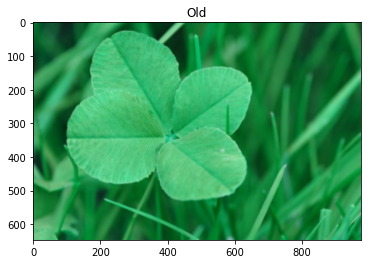

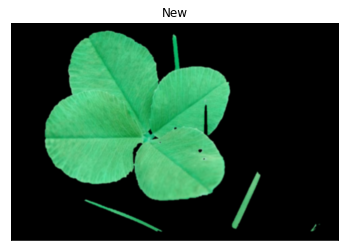

In [36]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('leaf2.jpg')

#resize image for faster runtime
if int(np.size(img, 1)) > 800:
    image = image_resize(img, width = 700)
    
mask = np.zeros(img.shape[:2],np.uint8)
fgdModel = np.zeros((1,65),np.float64)
bgdModel = np.zeros((1,65),np.float64)

# coordinates of a rectangle which includes the foreground object in the format (x,y,w,h)
width = int(np.size(img, 1)-25)
height = int(np.size(img, 0)-25)
rect = (0,0,width,height)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
new = img*mask2[:,:,np.newaxis]

display_both(img, new)

# Using Image Segmentation and Contours

https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html

https://docs.opencv.org/3.0.0/d4/d73/tutorial_py_contours_begin.html

https://stackoverflow.com/questions/25552765/python-opencv-second-largest-object

http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.106.5212&rep=rep1&type=pdf

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

# image segmentation
old = cv2.imread('k.jpg')
img = cv2.imread('k.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
thresh = cv2.cvtColor(thresh, cv2.COLOR_BGR2GRAY)

# finding the contours
contours,hierachy=cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(img, contours, -1, (0,255,0), 3)

# creating the list of areas
areaArray = []
for i, c in enumerate(contours):
    area = cv2.contourArea(c)
    areaArray.append(area)
    
# sorting by area
sortcontours = sorted(zip(areaArray, contours), key=lambda x: x[0], reverse=True)

# nth largest contour [n-1][1]
secondlargestcontour = sortcontours[0][1]

# draw
cv2.drawContours(img, secondlargestcontour, -1, (255, 0, 0), 2)
x, y, w, h = cv2.boundingRect(secondlargestcontour)
cv2.rectangle(img, (x, y), (x+w, y+h), (0,255,0), 2)

# display_both(old, img)

# use grabcut
rect = (x,y,w,h)
mask = np.zeros(img.shape[:2],np.uint8)
fgdModel = np.zeros((1,65),np.float64)
bgdModel = np.zeros((1,65),np.float64)

cv2.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv2.GC_INIT_WITH_RECT)
mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
img = img*mask2[:,:,np.newaxis]


display_both(old, img)

error: OpenCV(4.0.0) C:\projects\opencv-python\opencv\modules\imgproc\src\color.cpp:181: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'
